<a href="https://colab.research.google.com/github/MarlonSerrano/Previs-o_Pre-o_voo/blob/main/Previs%C3%A3o_de_pre%C3%A7o_de_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas utilizadas

In [1]:
# Carregamento dos dados
import pandas as pd
import numpy as np
# Biblioteca Graficas
import matplotlib.pyplot as plt
import seaborn as sns
# biblioteca de transformação de dados
from sklearn.preprocessing import LabelEncoder, Normalizer, MinMaxScaler
# bibliotecas para escolha das variáveis, e separar 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
# biblioteca para previsão do modelo
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Biblioteca para acuracia
from sklearn.metrics import r2_score


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregamentos dos dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Meus Projetos/Preço de voo/Clean_Dataset.csv',sep=',')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Analise exploratoria dos dados

In [4]:
# Verificar se existe dados faltantes nos dados ou nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [5]:
# Verificar os tipos de dados 
print(df.dtypes)

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [6]:
# Verificar o números de linhas e colunas do dataset
df.shape

(300153, 12)

In [7]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

### Analise descritiva dos dados

In [8]:
print(df.columns)


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


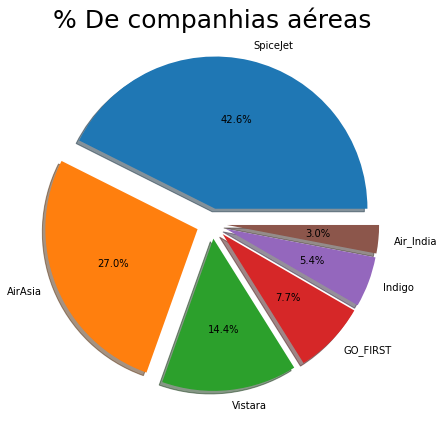

In [9]:
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)
fig,axis = plt.subplots(figsize=(10, 7))
axis.pie(df['airline'].value_counts(),labels=df['airline'].unique(),explode = explode,autopct='%1.1f%%',shadow=True)
plt.title("% De companhias aéreas",fontsize=25)
plt.show()
# Grafico em relação as companhias aéreas

Em relação as companhias mais requisitadas, mais de 50% se concentra na Spicejet e AirAsia

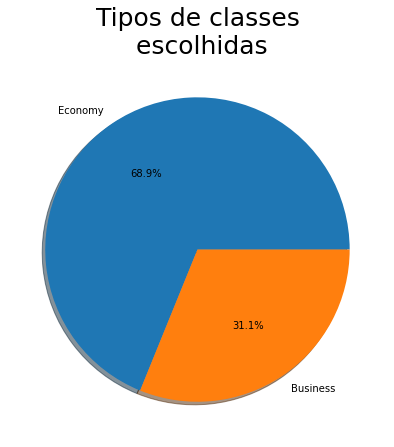

In [10]:
fig,axis = plt.subplots(figsize=(10,7))
axis.pie(df['class'].value_counts(),labels=df['class'].unique(),autopct='%1.1f%%',shadow=True)
plt.title("Tipos de classes\n escolhidas",fontsize=25)
plt.show()

Mais de 50% dos voos são de classe economica

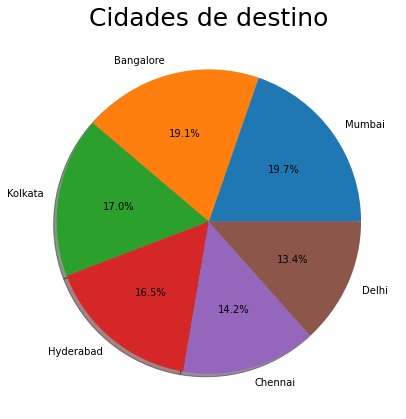

In [11]:

fig,axis = plt.subplots(figsize=(10,7))
axis.pie(df['destination_city'].value_counts(),labels=df['destination_city'].unique(),autopct='%1.1f%%',shadow=True)
plt.title("Cidades de destino",fontsize=25)
plt.show()

As cidades que em se destina a maioria dos voo Bangaiore e Mumbai

In [12]:
tab = pd.DataFrame(pd.crosstab(df['airline'],df['class'],values=df['price'],aggfunc='mean').round(0))
tab.fillna(0)

class,Business,Economy
airline,,
AirAsia,0.0,4091.0
Air_India,47131.0,7314.0
GO_FIRST,0.0,5652.0
Indigo,0.0,5324.0
SpiceJet,0.0,6179.0
Vistara,55477.0,7807.0


As companhias que tem o maior preço médio em relação a classe economica Air_india e a Vistara, sendo também únicas companhias que realiza-se vou executivo

In [13]:
df_companhias = df.groupby(['airline'])
df_companhias[['duration','price']].mean().round(0)

,duration,price
airline,,
AirAsia,9.0,4091.0
Air_India,16.0,23507.0
GO_FIRST,9.0,5652.0
Indigo,6.0,5324.0
SpiceJet,13.0,6179.0
Vistara,13.0,30397.0


As companhias com maior tempo de voo Air_India que é a que possui um dos maiores preços seguida da SpiceJet e Vistara

In [14]:
tab_2 = pd.DataFrame(pd.crosstab(df['airline'],df['destination_city'],values=df['price'],aggfunc='mean').round(0))
tab_2 

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,4528.0,3430.0,4305.0,4087.0,4037.0,3545.0
Air_India,25435.0,25110.0,21527.0,21395.0,24917.0,23226.0
GO_FIRST,5718.0,5347.0,5780.0,4880.0,6113.0,5597.0
Indigo,4974.0,4853.0,5452.0,4949.0,6203.0,5221.0
SpiceJet,6123.0,5649.0,6114.0,5924.0,6629.0,6193.0
Vistara,30632.0,29856.0,28544.0,28144.0,34111.0,31167.0


Quando se analisa o preço médio em relação a cidade destino, observa-se que não possui muita influência a cidade destino no preço, sendo a principal razão a companhia area escolhida que afeta o preço 

In [15]:
tab_3 = pd.DataFrame(pd.crosstab(df['airline'],df['source_city'],values=df['price'],aggfunc='mean').round(0))
tab_3

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,4223.0,3244.0,4515.0,3359.0,4505.0,3698.0
Air_India,24874.0,25416.0,21900.0,22458.0,25234.0,22541.0
GO_FIRST,5492.0,5404.0,5742.0,4958.0,6639.0,5421.0
Indigo,5231.0,4827.0,5387.0,4774.0,6224.0,5371.0
SpiceJet,6185.0,5401.0,6085.0,6190.0,6853.0,6102.0
Vistara,30834.0,30402.0,28939.0,27791.0,32794.0,31522.0


Em relação a cidade de origem pouco afeta o preço, tendo mais efeito a companhia escolhida

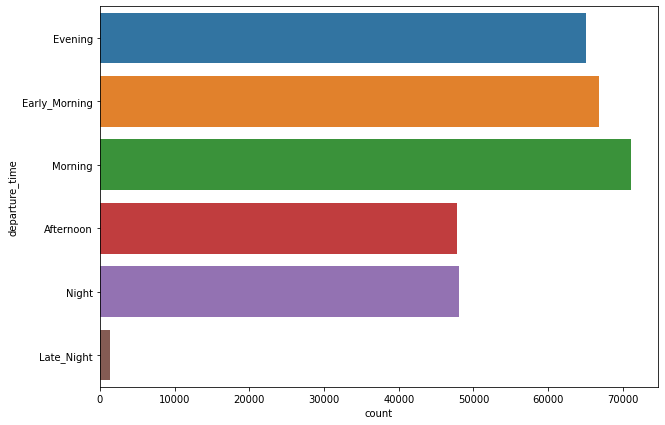

In [16]:

fig,axis = plt.subplots(figsize=(10,7))
axis = sns.countplot(y='departure_time',data=df)

Em relação a preferência de turno de viagem, a maioria dos voos se concentra na parte da manhã, e o horario com menor preferência de voo é de  madrugada.

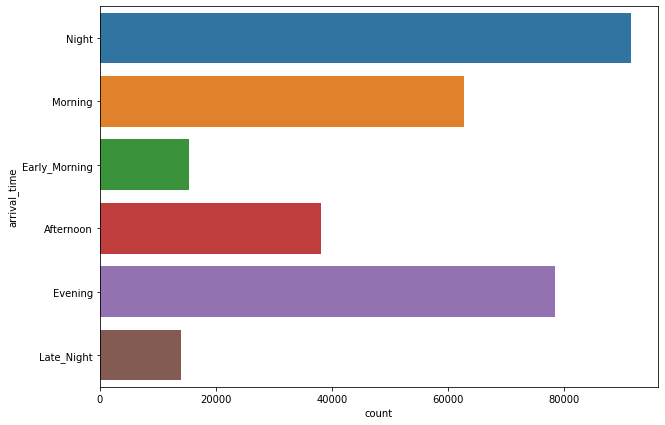

In [17]:

fig,axis = plt.subplots(figsize=(10,7))
axis = sns.countplot(y='arrival_time',data=df)

Em relação ao horario de chegada dos voos a maioria chega na parte da  noite 

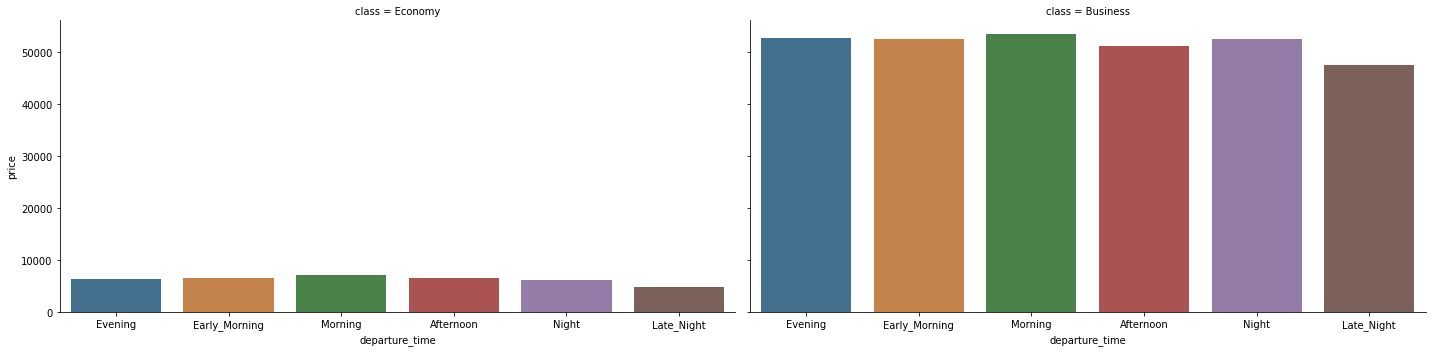

In [18]:

axis = sns.catplot(x="departure_time", y="price", col="class",
                data=df, saturation=.5,
                kind="bar", ci=None,aspect=2)


Quando se compara o horário que se compra as passagens de voos, os mais baratos tanto na classe econômica como executiva é os de madrugada.

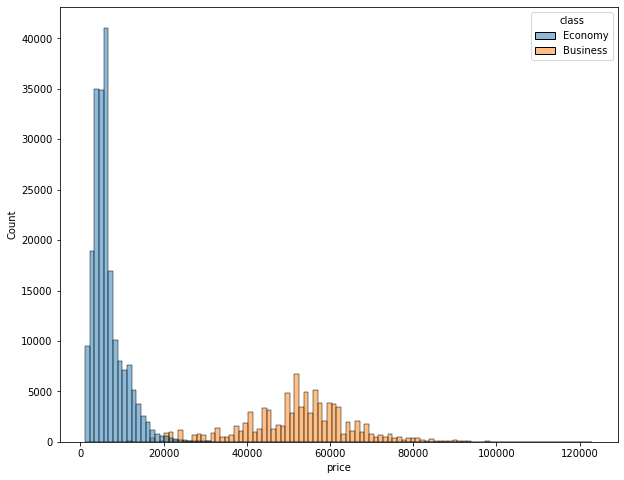

In [19]:
fig,axis = plt.subplots(figsize=(10,8))
sns.histplot(data=df,x='price',hue='class') # Distribuição de frequência dos preços

Analisando a distribuição do preço, observa-se que o preço da classe executiva possui uma distribuição mais proxima do  normal, enquanto a classe econimica possui um distribuição um pouco assimetrica a direita, em que significa que tanto a moda como a medianda são maiores que a média.

## Modelagem dos dados

In [20]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [21]:
df_2 = df.copy()

In [22]:
# deletando as colunas que não seram usadas
del df_2['Unnamed: 0']
del df_2['flight']

In [23]:
df_2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [24]:
# Separando variáveis categoricas 
x_var_cat = df_2.iloc[:,0:7]
x_var_num = df_2.iloc[:,7:9]
y = df_2['price']

In [25]:
x_var_num.head()

,duration,days_left
0,2.17,1
1,2.33,1
2,2.17,1
3,2.25,1
4,2.33,1


In [26]:
x_var_cat.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


In [27]:
# Binarizar as variaveis categoricas
x_binario = pd.get_dummies(x_var_cat)
x_binario

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
300149,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
300150,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
300151,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [28]:
# Escalar variaveis numericas
escala = MinMaxScaler(feature_range=(0,1))
x_escal = escala.fit_transform(x_var_num)
x_escal = pd.DataFrame(x_escal,columns=['duration','days_left'])

In [29]:
# Juntando as variveis transformadas 
x_transf = pd.merge(left=x_binario,right=x_escal,left_index=True,right_index=True)
x_transf.head(5)

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0.027347,0.0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0.030612,0.0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0.027347,0.0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0.028980,0.0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0.030612,0.0


In [30]:
# Juntando todos os dados 
df_3 = pd.merge(left=y,right=x_transf,left_index=True,right_index=True).copy()

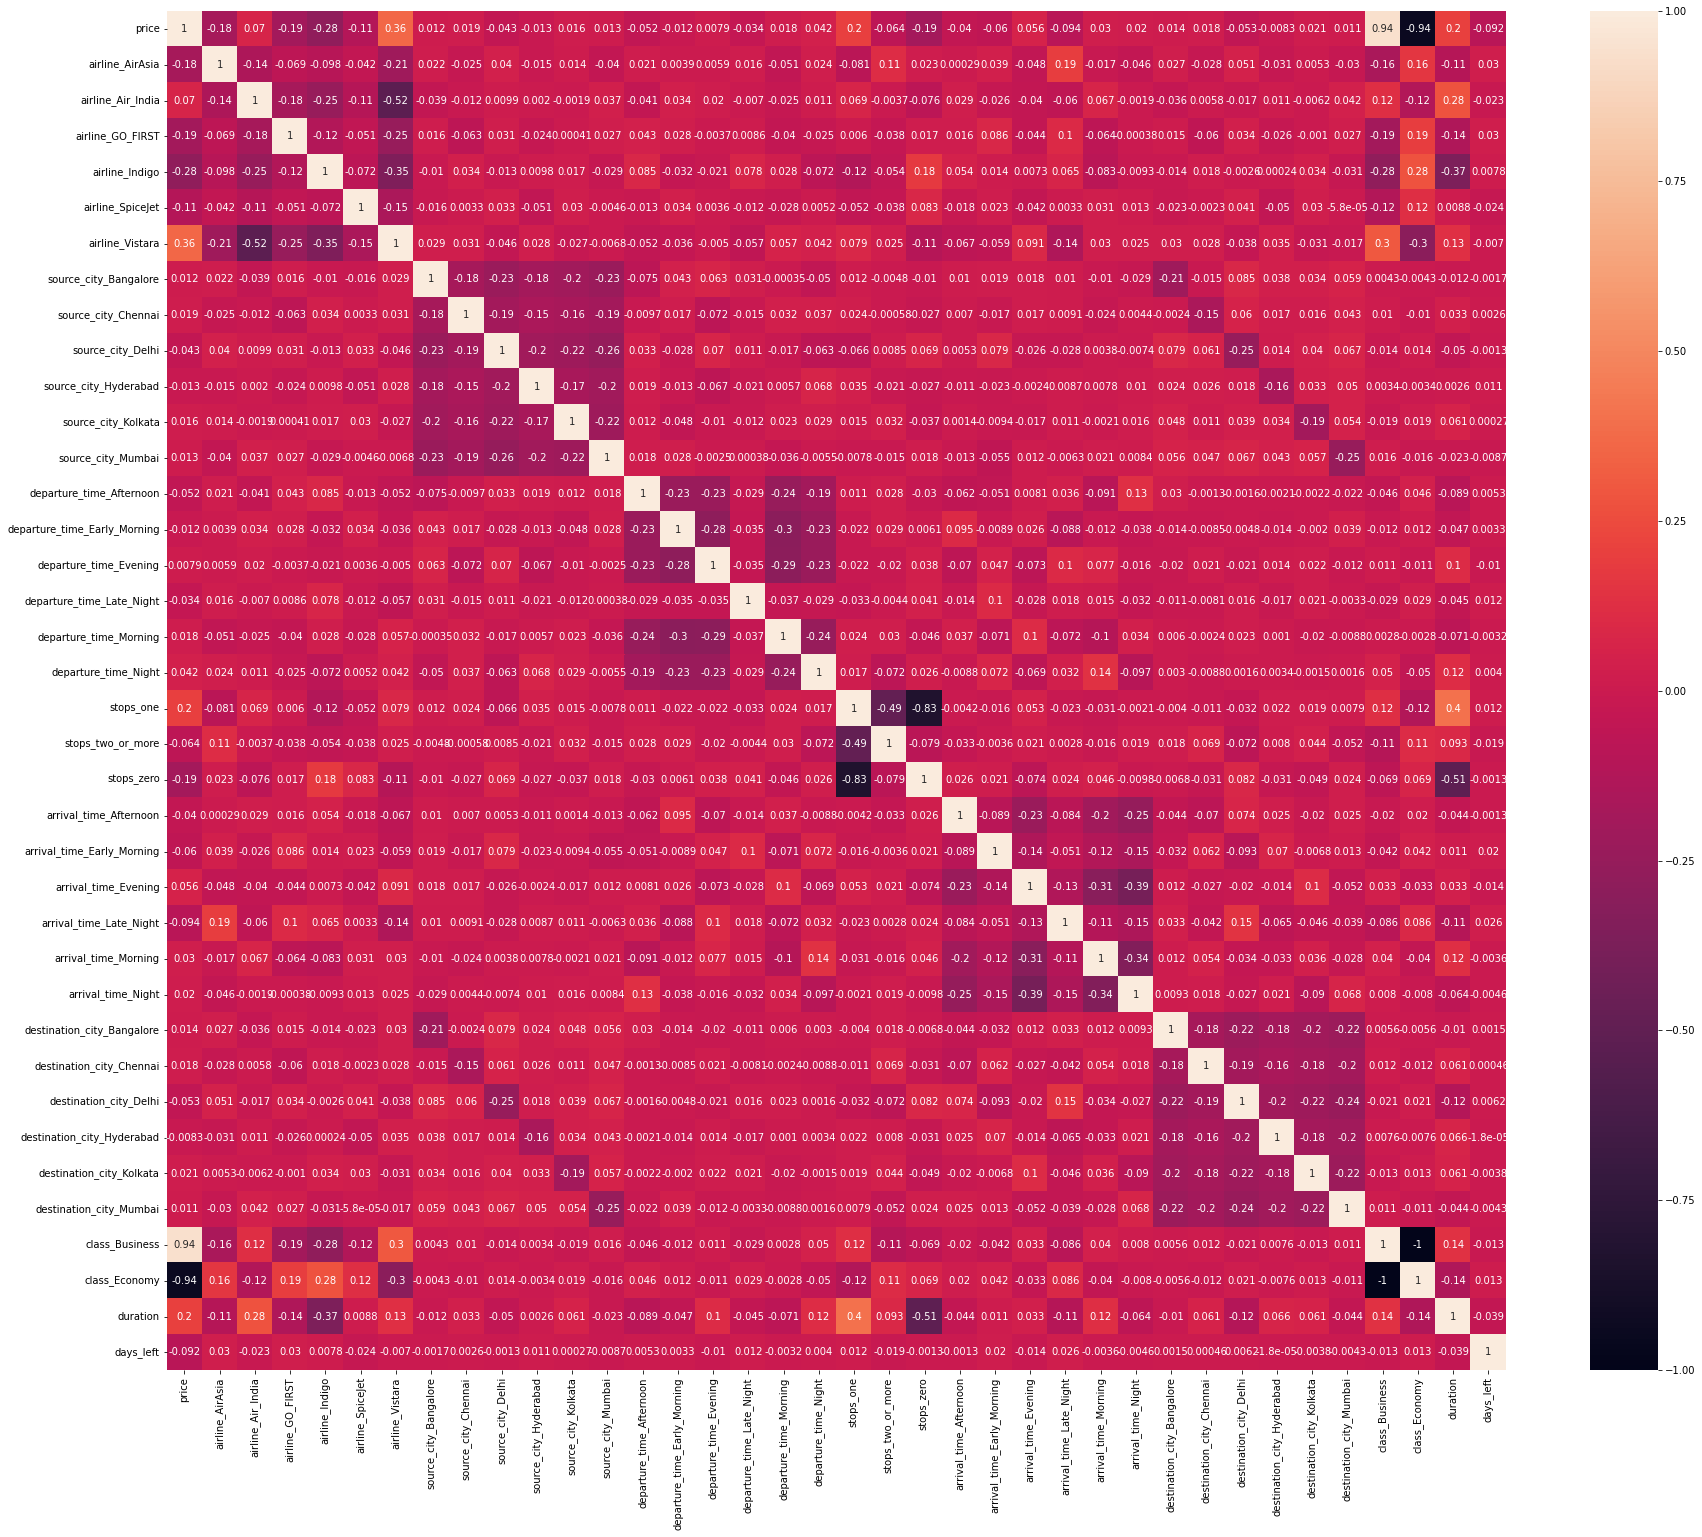

In [31]:
# Tabela de correlação da variveis

plt.figure(figsize = (30, 25))
sns.heatmap(df_3.corr(),annot=True)
plt.show()

## Rodando o modelo

In [32]:
modelo_1 = LinearRegression() # Modelo de regressão linear
modelo_2 = DecisionTreeRegressor () # Floresta aleatoria

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_transf, y, test_size=0.30, random_state=42) # separando as variveis em treino e teste

In [34]:
score_1 = []
score_2 = []

In [35]:
# Testando o R2 do modelo acrescentando a partir de 11 variáveis
contador = 10
while contador < 37:
  contador = contador +1
  rfe = RFE(modelo_1,n_features_to_select=contador)
  treino = rfe.fit(X_train,y_train)
  previsao = treino.predict(X_test)
  R2 = (r2_score(y_test,previsao)*100).round(2)
  score_1.append(R2)
  


In [36]:
# Testando o R2 do modelo acrescentando a partir de 11 variáveis
contador = 10
while contador < 37:
  contador = contador +1
  rfe = RFE(modelo_2,n_features_to_select=contador)
  treino = rfe.fit(X_train,y_train)
  previsao = treino.predict(X_test)
  R2 = (r2_score(y_test,previsao)*100).round(2)
  score_2.append(R2)


In [37]:
dados = pd.DataFrame(score_1,columns=['Regressão_Linear'])
dados['Floresta'] = score_2
dados['Variaveis'] = range(10,37)
dados

,Regressão_Linear,Floresta,Variaveis
0,1.83,95.88,10
1,1.83,96.04,11
2,1.90,96.44,12
3,2.27,96.57,13
4,2.37,96.79,14
5,2.42,97.01,15
6,2.46,97.12,16
7,2.47,97.32,17
8,88.40,97.31,18
9,88.40,97.30,19


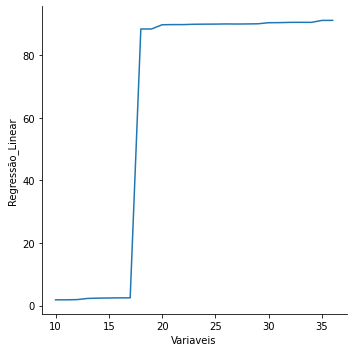

In [38]:
g = sns.relplot(x='Variaveis',y = 'Regressão_Linear',data=dados,kind="line")


No modelo de regressão passa a ter o R2 acima de 90% com 18 variáveis, mesmo acrescentando mais variáveis o modelo não consegue aumentar seu poder de previsão.

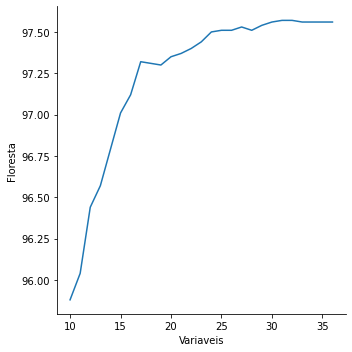

In [39]:
g = sns.relplot(x='Variaveis',y = 'Floresta',data=dados,kind="line")

O modelo de Floresta consegue bons resultados a partir de 10 variáveis, sendo superior o poder de previsão ao de regressão linear com menos variaveis 